<a href="https://colab.research.google.com/github/AniketC24/Datascience/blob/main/Case_study_02_Bank_Telemarking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importing Data Manipulation Library
import pandas as pd
import numpy as np
# Importing Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt
# Import FilterWarnings Library
import warnings
warnings.filterwarnings('ignore')

In [16]:
# Importing Data Using Pandas Function
df = pd.read_csv('bank.csv')
# df = pd.read_csv('bank.csv',sep = ';')  and ','  in the seperated datast
# It will print 100 & shuffle data
df.sample(frac = 1)
# df.head() # it will print top five rows
# df.tail() # it will print bottom five rows

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
502,31,management,married,tertiary,no,13,no,no,cellular,28,aug,110,5,-1,0,unknown,no
4344,42,housemaid,divorced,tertiary,no,364,no,no,cellular,18,nov,52,1,-1,0,unknown,no
1554,36,services,married,secondary,no,1328,yes,no,unknown,6,jun,82,4,-1,0,unknown,no
1459,31,technician,single,secondary,no,433,no,no,cellular,11,aug,1504,2,-1,0,unknown,no
3708,35,management,divorced,tertiary,no,473,no,yes,cellular,5,aug,37,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3927,37,management,married,tertiary,no,1698,yes,no,unknown,6,jun,95,2,-1,0,unknown,no
4392,50,unemployed,married,secondary,no,3357,no,no,cellular,9,jun,239,4,-1,0,unknown,yes
3430,30,technician,single,tertiary,no,1922,yes,no,cellular,18,may,546,1,-1,0,unknown,no
738,36,technician,single,secondary,no,1855,yes,no,cellular,4,feb,75,1,273,1,failure,no


In [17]:
# Problem Definition:
'''
This dataset belongs to Portugal Bank Telemarketing.Where our aim is to predict where the client will subscribe to a term deposit or not. Hence 'y' will be act as target Column or dependent column whereas other columns are independent columns.

x = independent columns
y = dependent columns / Target Column

'''
# Checking Dataset Information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


<Axes: >

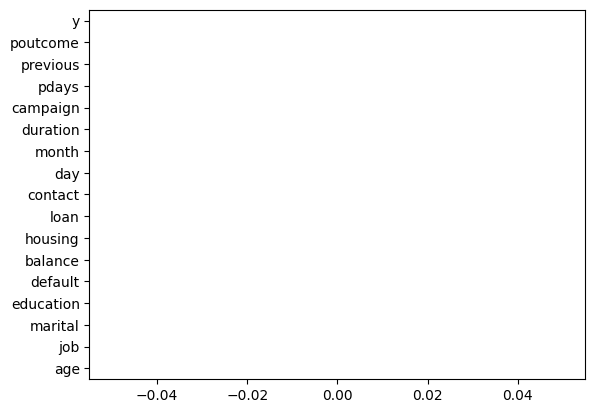

In [18]:
# Checking Null Values Present in Dataset
# The following Graph shows, we dont have any missing value present in any of the coloumn
df.isnull().sum().plot(kind = 'barh') # First Method

<Axes: >

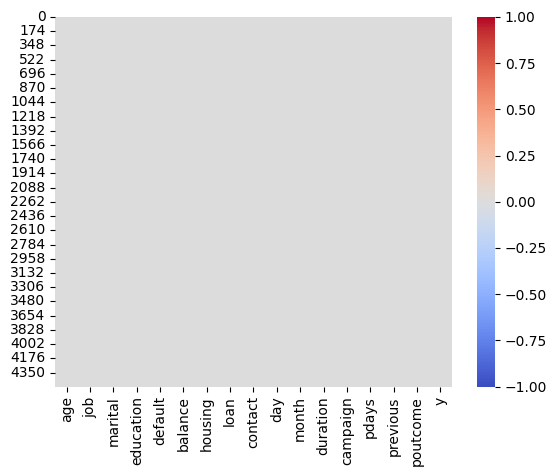

In [19]:
# Checking Null Values Present in Dataset
# The following Graph shows, we dont have any missing value present in any of the coloumn
sns.heatmap(df.isnull(),cmap='coolwarm',vmin=-1,vmax=1,center =0)
# Second Method


<Axes: >

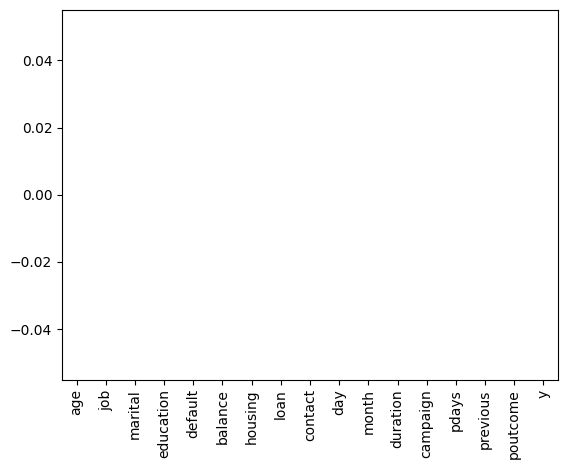

In [20]:
# Checking Null Values Present in Dataset
# The following Graph shows, we dont have any missing value present in any of the coloumn
df.isnull().sum().plot(kind = 'bar',cmap = 'viridis') # Third Method

In [21]:
# Split the Dataset Into Categorical and Numerical

categorical_col = df.select_dtypes(include ='object')
categorical_col


,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
4516,services,married,secondary,no,yes,no,cellular,jul,unknown,no
4517,self-employed,married,tertiary,yes,yes,yes,unknown,may,unknown,no
4518,technician,married,secondary,no,no,no,cellular,aug,unknown,no
4519,blue-collar,married,secondary,no,no,no,cellular,feb,other,no


In [22]:
numerical_col = df.select_dtypes(exclude ='object')
numerical_col

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0
...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0
4517,57,-3313,9,153,1,-1,0
4518,57,295,19,151,11,-1,0
4519,28,1137,6,129,4,211,3


In [23]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


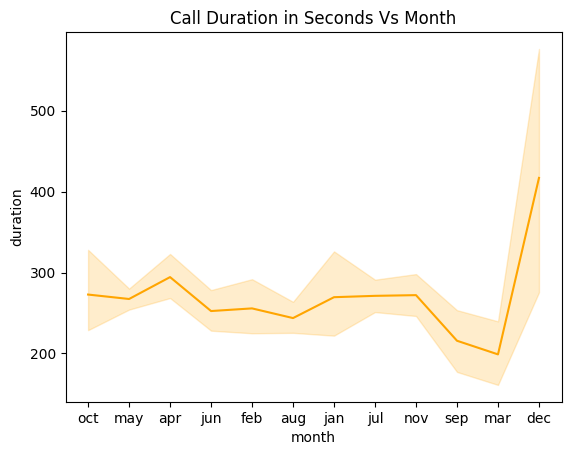

In [24]:
sns.lineplot(x =df['month'], y =df['duration'], c='orange')
plt.title('Call Duration in Seconds Vs Month')
plt.show()

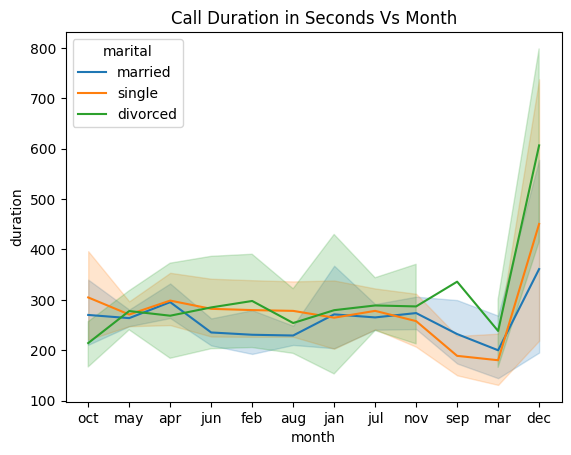

In [25]:
sns.lineplot(x =df['month'], y =df['duration'], c='orange',hue =df['marital'])
plt.title('Call Duration in Seconds Vs Month')
plt.show()

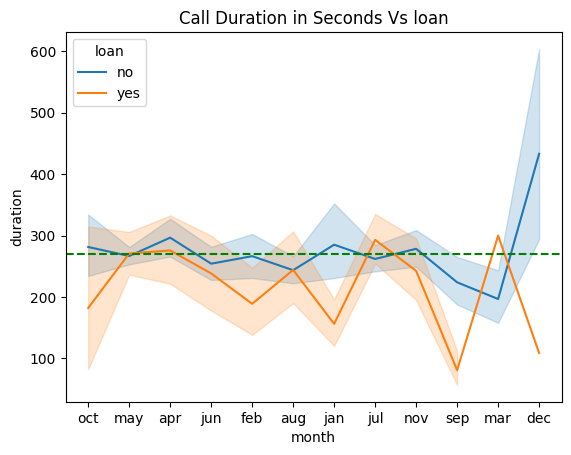

In [26]:
sns.lineplot(x =df['month'], y =df['duration'],hue =df['loan'])
plt.title('Call Duration in Seconds Vs loan')
plt.axhline(270,linestyle ='--', c='green')
plt.show()

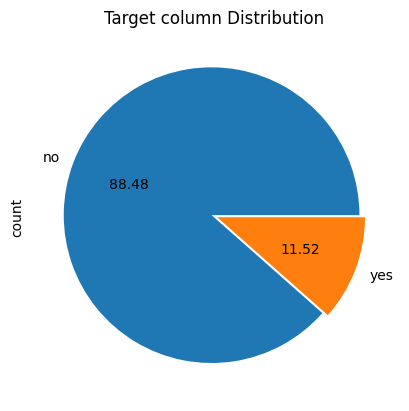

In [5]:
df['y'].value_counts().plot(kind = 'pie',autopct = '%1.2f',explode = (0.02,0.02))
plt.title('Target column Distribution')
plt.show()

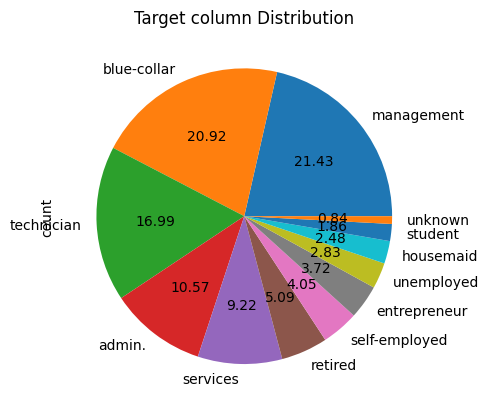

In [6]:
df['job'].value_counts().plot(kind = 'pie',autopct = '%1.2f')
plt.title('Target column Distribution')
plt.show()

In [7]:
management_job = df[(df['job'] == 'management') & (df['y'] == 'yes')]


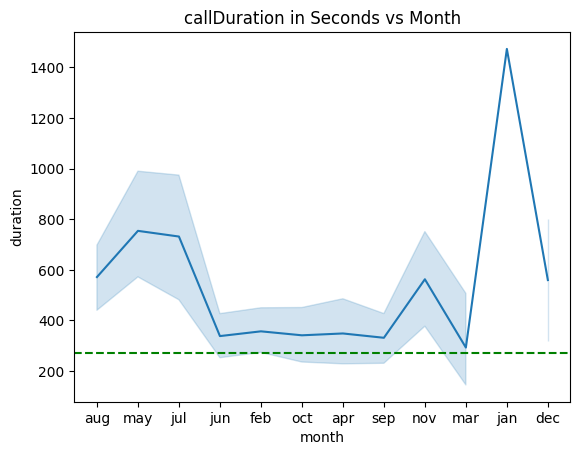

In [8]:
sns.lineplot(x = management_job['month'],y = management_job['duration'])
plt.axhline(270,linestyle = '--',c = 'green')
plt.title('callDuration in Seconds vs Month')
plt.show()

In [27]:
bluecoller_job= df[(df['job'] == 'blue-collar') & (df['y'] == 'yes')]

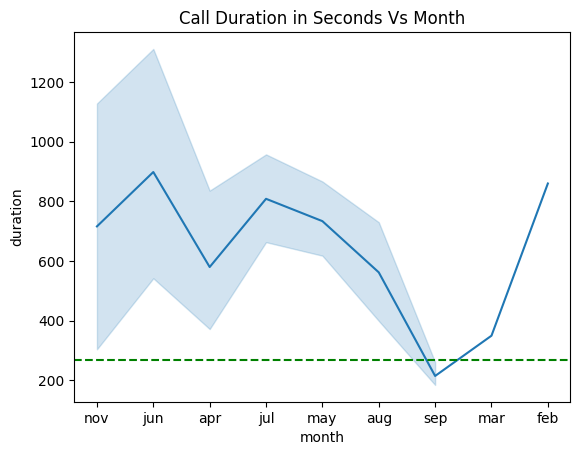

In [28]:
sns.lineplot(x =bluecoller_job['month'], y =bluecoller_job['duration'])
plt.axhline(270,linestyle ='--', c='green')
plt.title('Call Duration in Seconds Vs Month')
plt.show()


In [29]:
technician_job= df[(df['job'] == 'technician') & (df['y'] == 'yes')]

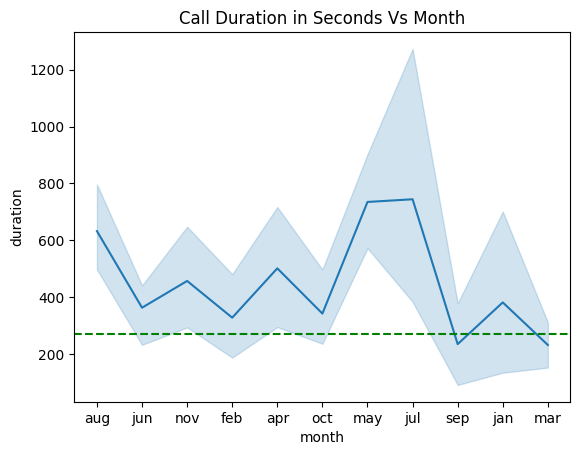

In [30]:
sns.lineplot(x =technician_job['month'], y =technician_job['duration'])
plt.axhline(270,linestyle ='--', c='green')
plt.title('Call Duration in Seconds Vs Month')
plt.show()

In [31]:
services_job= df[(df['job'] == 'services') & (df['y'] == 'yes')]

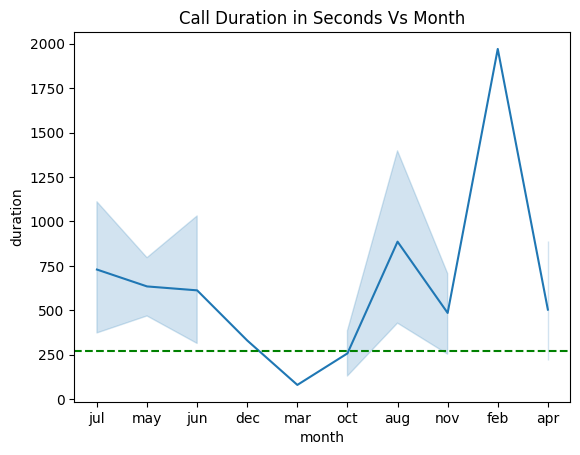

In [32]:
sns.lineplot(x =services_job['month'], y =services_job['duration'])
plt.axhline(270,linestyle ='--', c='green')
plt.title('Call Duration in Seconds Vs Month')
plt.show()

In [9]:
df[df['job'] == 'admin.'].agg(['mode'])

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode
0,34.0,admin.,married,secondary,no,0.0,yes,no,cellular,20.0,may,77,1.0,-1.0,0.0,unknown,no
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,NaN,NaN,NaN,NaN,NaN


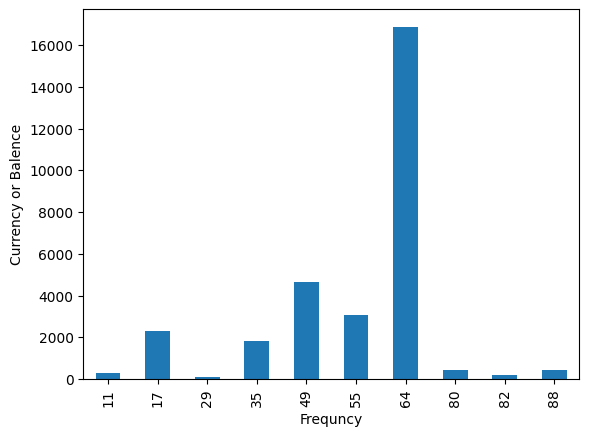

In [10]:
df[df['job'] == 'admin.']['balance'][:10].plot(kind = 'bar')
plt.xlabel('Frequncy')
plt.ylabel('Currency or Balence')
plt.show()

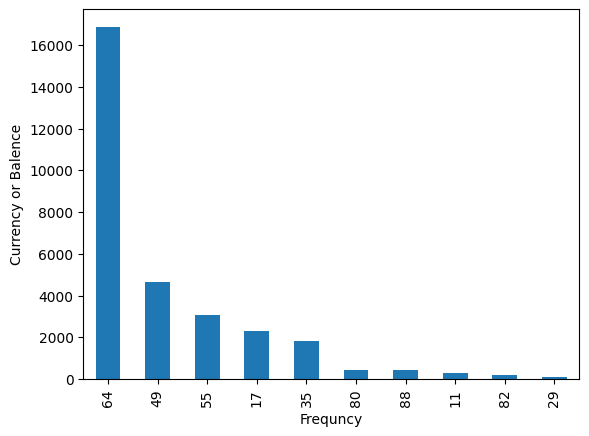

In [11]:
df[df['job'] == 'admin.']['balance'][:10].sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Frequncy')
plt.ylabel('Currency or Balence')
plt.show()

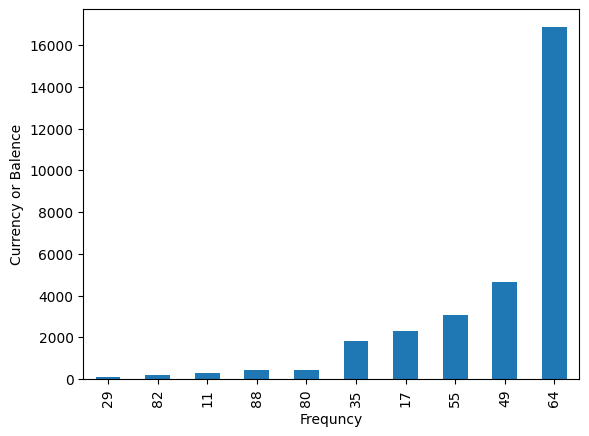

In [12]:
df[df['job'] == 'admin.']['balance'][:10].sort_values(ascending = True).plot(kind = 'bar')
plt.xlabel('Frequncy')
plt.ylabel('Currency or Balence')
plt.show()

In [13]:
divorced = df[(df['marital'] == 'divorced') & (df['y'] == 'yes')]


<Axes: ylabel='count'>

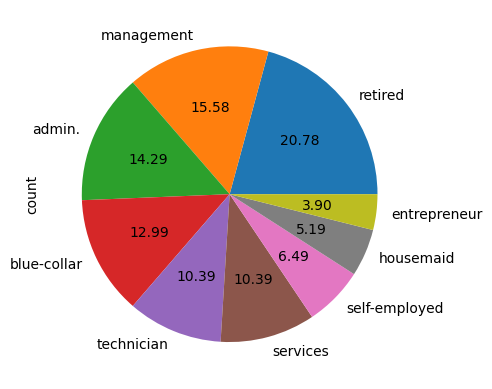

In [33]:
divorced['job'].value_counts().plot(kind=  'pie',autopct = '%1.2f')

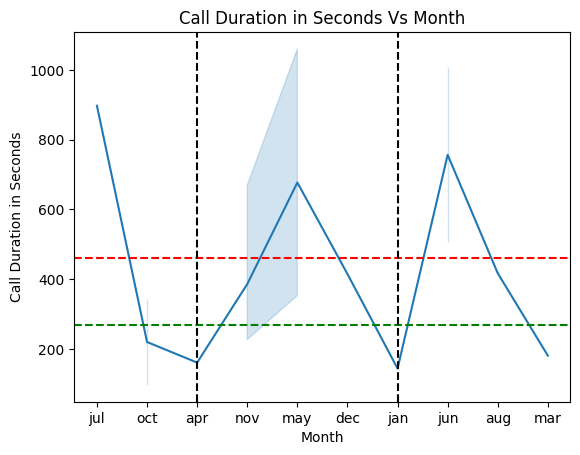

In [34]:
divorced_retired =divorced[divorced['job'] == 'retired']

sns.lineplot(x =divorced_retired['month'], y =divorced_retired['duration'])
plt.axhline(270,linestyle ='--', c='green')
plt.axhline(divorced_retired['duration'].mean(),linestyle ='--', c='red')
plt.xlabel('Month')
plt.ylabel('Call Duration in Seconds')
plt.axvline('apr',linestyle ='--', c='black')
plt.axvline('jan',linestyle ='--', c='black')
plt.title('Call Duration in Seconds Vs Month')
plt.show()


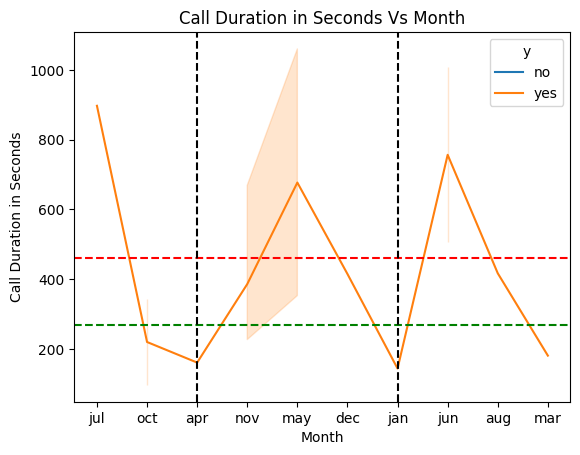

In [35]:
divorced_retired =divorced[divorced['job'] == 'retired']

sns.lineplot(x =divorced_retired['month'], y =divorced_retired['duration'],hue=df['y'])
plt.axhline(270,linestyle ='--', c='green')
plt.axhline(divorced_retired['duration'].mean(),linestyle ='--', c='red')
plt.xlabel('Month')
plt.ylabel('Call Duration in Seconds')
plt.axvline('apr',linestyle ='--', c='black')
plt.axvline('jan',linestyle ='--', c='black')
plt.title('Call Duration in Seconds Vs Month')
plt.show()

<Axes: ylabel='count'>

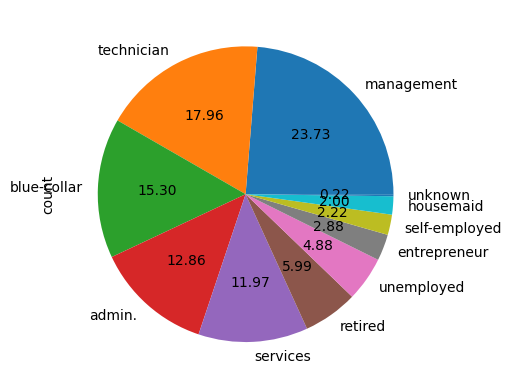

In [37]:
divorced=df[(df['marital'] == 'divorced') & (df['y'] == 'no')]

divorced['job'].value_counts().plot(kind=  'pie',autopct = '%1.2f')